In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
annual_crime = pd.read_pickle('../data/pickled/annual_crime.pkl')
monthly_crime = pd.read_pickle('../data/pickled/monthly_crime.pkl')

In [4]:
annual_crime.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,624.935484,580.225806,572.838710,536.645161,517.709677,586.774194,609.064516,625.580645,617.129032
1,571.392857,523.607143,528.172414,501.321429,487.892857,570.750000,596.000000,609.178571,608.000000
2,584.096774,545.870968,534.290323,521.838710,502.451613,579.451613,587.870968,623.741935,610.161290
3,591.600000,547.333333,542.533333,523.300000,513.466667,563.466667,619.000000,622.766667,634.200000
4,570.935484,545.903226,563.483871,534.612903,538.548387,577.096774,612.967742,624.709677,639.419355


In [5]:
monthly_crime.head()

,crime_count
Date,
2010-01-01,624.935484
2010-02-01,571.392857
2010-03-01,584.096774
2010-04-01,591.600000
2010-05-01,570.935484


### Modeling on monthly crime dataframe

#### Trend Analysis in Data

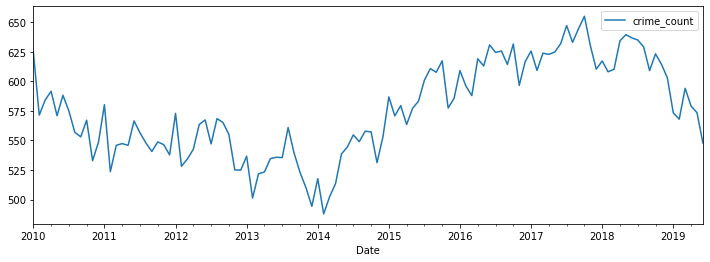

In [6]:
monthly_crime.plot(figsize=(12,4))

From the plot, there seems to be a some periodic trend and some seasonality, also a trend that goes up from 2014 to 2018 and a falling trend from there on. Although, we only have data on the first eight months of 2019, data collection during 2019 seems to be lacking or there truly was falling numbers of crime

Due to the presence of trend, our data is not stationary, the mean is defintely not constant. We can look at the rolling statistics (rolling mean and roilling standard deviation) to confirm.

#### Rolling statistics

We can plot the moving average or moving variance and see if it varies with time. By moving average/variance we mean at any point in time **$t$**, we can take the average/variance of the **$w$** last time periods. **$w$** is then known as the window size.

In [7]:
roll_mean = monthly_crime.rolling(window=8, center=False).mean()
roll_std = monthly_crime.rolling(window=8, center=False).std()

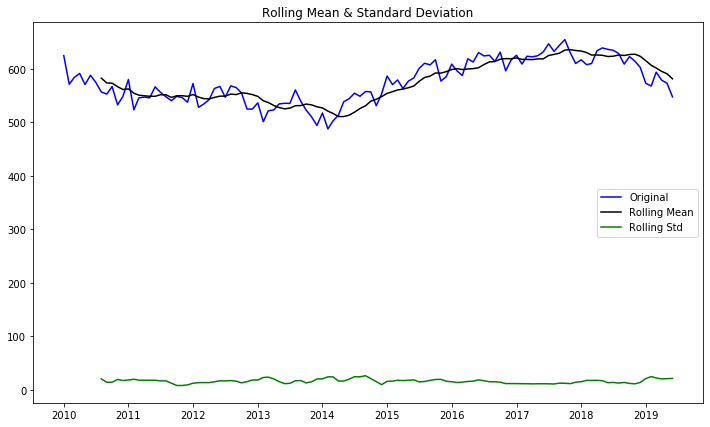

In [8]:
fig = plt.figure(figsize=(12,7))
plt.plot(monthly_crime, color='blue', label='Original')
plt.plot(roll_mean, color='black', label='Rolling Mean')
plt.plot(roll_std, color='green', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

The black and green lines represent the rolling mean and rolling standard deviations. In the plot we can see that mean is not constant over time, so we can confirm our conclusion that the time series is not stationary based on rolling mean and rolling standard error.

In [9]:
X = monthly_crime['crime_count']
X = X[np.logical_not(np.isnan(X))]
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=546.127441, mean2=605.584653
variance1=646.720180, variance2=750.762978


As you can see the mean is not constant and the variance is also changing

In [10]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(monthly_crime)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                  -1.861812
p-value                          0.350234
#Lags Used                      13.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64

At a 95% confidence, we fail to reject the null that the monthly crime data is not stationary.

In [11]:
monthly_crime.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01'],
              dtype='datetime64[ns]', name='Date', length=114, freq='MS')

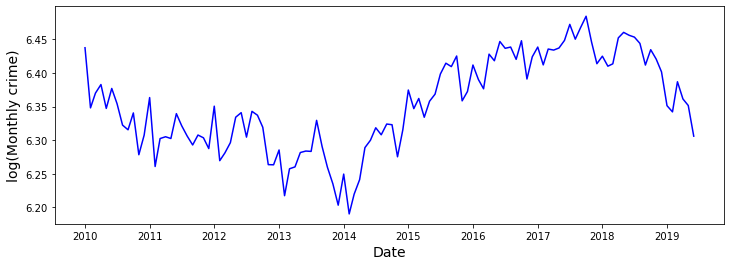

In [12]:
data = pd.Series(np.log(monthly_crime.crime_count), index=monthly_crime.index)
fig = plt.figure(figsize=(12,4))
plt.plot(data, color='blue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('log(Monthly crime)', fontsize=14)
plt.show()

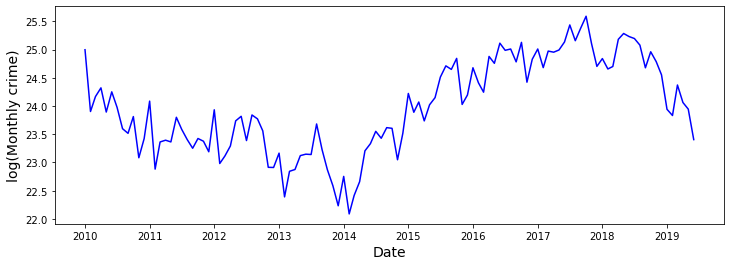

In [13]:
data1 = pd.Series(np.sqrt(monthly_crime.crime_count), index=monthly_crime.index)
fig = plt.figure(figsize=(12,4))
plt.plot(data1, color='blue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('log(Monthly crime)', fontsize=14)
plt.show()

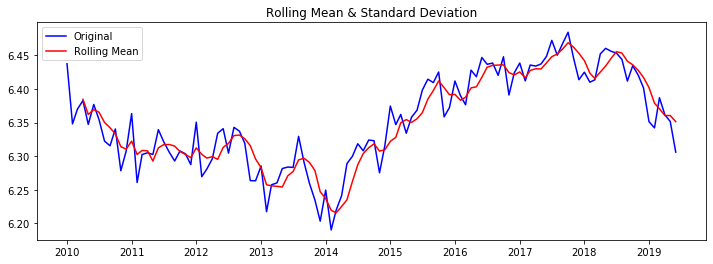

In [14]:
roll_mean = data.rolling(window=4).mean()
fig = plt.figure(figsize=(12,4))
plt.plot(data, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [15]:
# Subtract the moving average from the original data
data_minus_roll_mean = data - roll_mean
data_minus_roll_mean.head(15)

Date
2010-01-01         NaN
2010-02-01         NaN
2010-03-01         NaN
2010-04-01   -0.001825
2010-05-01   -0.014786
2010-06-01    0.007714
2010-07-01   -0.011086
2010-08-01   -0.027842
2010-09-01   -0.026851
2010-10-01    0.007381
2010-11-01   -0.035882
2010-12-01   -0.002966
2011-01-01    0.041000
2011-02-01   -0.041729
2011-03-01   -0.006116
Freq: MS, Name: crime_count, dtype: float64

In [16]:
data_minus_roll_mean.dropna(inplace=True)

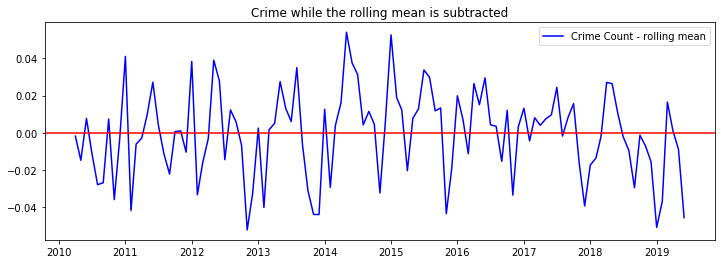

In [17]:
fig = plt.figure(figsize=(12,4))
plt.plot(data_minus_roll_mean, color='blue',label='Crime Count - rolling mean')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(loc='best')
plt.title('Crime while the rolling mean is subtracted')
plt.show(block=False)

In [18]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data_minus_roll_mean)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                 -1.319125
p-value                         0.620378
#Lags Used                     12.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64

p value is greater than p critical at 0.05. Fail to Reject null of Not Stationary. The rolling mean subtracted log crime count data is not stationary

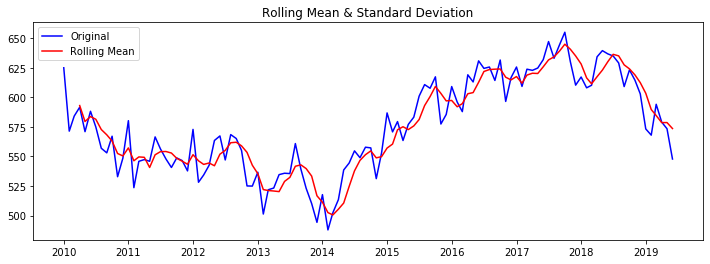

In [19]:
roll_mean = monthly_crime.rolling(window=4).mean()
fig = plt.figure(figsize=(12,4))
plt.plot(monthly_crime, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [20]:
# Subtract the moving average from the original data
data_minus_roll_mean = monthly_crime - roll_mean
data_minus_roll_mean.head(10)

,crime_count
Date,
2010-01-01,NaN
2010-02-01,NaN
2010-03-01,NaN
2010-04-01,-1.406279
2010-05-01,-8.570795
2010-06-01,4.466935
2010-07-01,-6.473925
2010-08-01,-15.831989
2010-09-01,-15.226344


In [21]:
data_minus_roll_mean.dropna(inplace=True)

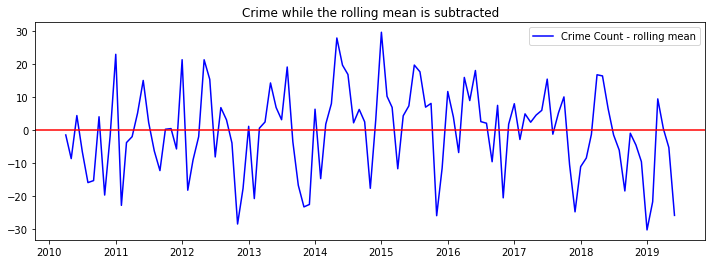

In [22]:
fig = plt.figure(figsize=(12,4))
plt.plot(data_minus_roll_mean, color='blue',label='Crime Count - rolling mean')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(loc='best')
plt.title('Crime while the rolling mean is subtracted')
plt.show(block=False)

In [23]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data_minus_roll_mean)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                 -1.194470
p-value                         0.675970
#Lags Used                     12.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64

Logged and non logged has no effect once using the rolling mean subtraction. Still not stationary.

In [24]:
crime_diff = monthly_crime.diff(periods=1)
crime_diff.head(10)

,crime_count
Date,
2010-01-01,NaN
2010-02-01,-53.542627
2010-03-01,12.703917
2010-04-01,7.503226
2010-05-01,-20.664516
2010-06-01,17.231183
2010-07-01,-13.231183
2010-08-01,-18.032258
2010-09-01,-3.869892


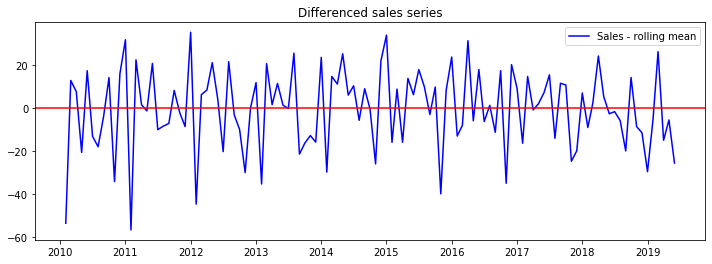

In [25]:
fig = plt.figure(figsize=(12,4))
plt.plot(crime_diff, color='blue',label='Sales - rolling mean')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

In [26]:
crime_diff.dropna(inplace=True)

In [27]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(crime_diff)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                  -1.675236
p-value                          0.443915
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64

### Seasonal Decomposition

Breaking down the changes over time in trend, seasonality and residual (random/noise)

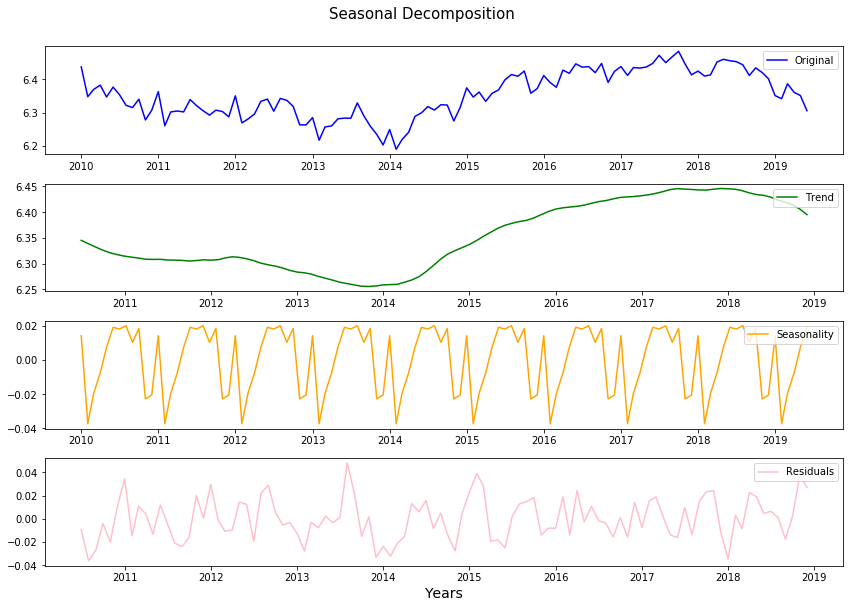

In [38]:
# Instantiating decomposition object
decomposition = seasonal_decompose(np.log(monthly_crime))

# Gather the trend, seasonality, and residuals for the monthly crime data
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.suptitle('Seasonal Decomposition', y = 1.05, size = 15)

#plotting original data in a subplot and showing legend
plt.subplot(411)
plt.plot(np.log(monthly_crime), label='Original', color='blue')
plt.legend(loc=1)

#plotting decomposed trend in a subplot and showing legend
plt.subplot(412)
plt.plot(trend, label='Trend', color='green')
plt.legend(loc=1)

#plotting decomposed seasonality in a subplot and showing legend
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='orange')
plt.legend(loc=1)
plt.subplot(414)

#plotting decomposed residual or noise in a subplot and showing legend
plt.plot(residual, label='Residuals', color='pink')
plt.xlabel('Years', size = 14)
plt.legend(loc=1)
plt.tight_layout()

plt.savefig('../visualizations/LA Crime- Time Series Seasonal Decomposition')

In [ ]:
x

In [ ]:
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

In [ ]:
# Drop missing values from residuals 
crime_log_decompose = residual
crime_log_decompose.dropna(inplace=True)

# Check stationarity
stationarity_check(crime_log_decompose)

Residuals are stationary at a 95% confidence

>The p statistic is significant and below 0.05 . So it seems reasonable to assume this time series is stationary.

*"In time series context, residuals must be stationary in order to avoid spurious regressions (Woolridge, 2012), if there are no properties of
stationarity among the residuals, then basically our results tend to produce
fake relationships in our model."*

#### Comparing the crime count time series, with the time series of a lag of one

In [ ]:
crime_shift_1 = monthly_crime.shift(periods=1)
lag_1 = pd.concat([crime_shift_1, monthly_crime], axis=1)
lag_1.corr()

In [ ]:
for i in range(1,14):
    crime_shift = monthly_crime.shift(periods=i)
    lag = pd.concat([crime_shift, monthly_crime], axis=1)
    print('lag {}'.format(i), lag.corr())

autocorrelation highest at lag 2 and lag 13 also visible in the peaks in the autocorrelation plot below

In [ ]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(monthly_crime);

From the plot, we can see that there are peaks at intervals of 12. The statistical significance falls around 15 to 16 lags.

MA(k)--- ACF strong autocorrelation till lag 16, with peaks at lag 2 and 12

AR(k)--- ACF stong to a lag of 12

In [ ]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(crime_diff);

The ACF on the (1)differenced data seems a little more stable, revolving around 0. Additionally, the autocorrelation for multiples of 12 seems consistently statistically significant, while it decays for longer time lags!

We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. MA(k), k 60?

we would expect the ACF for the AR(k) process to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect is weakened.--- strong to a lag of 48 or 60?

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(monthly_crime, lags=25);

In [ ]:
plot_pacf(crime_diff, lags=25);

### AR Model--- ARMA(#,0)

In [ ]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(1,0))
res_arma = mod_arma.fit()
res_arma.summary()

In [ ]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(2,0))
res_arma = mod_arma.fit()
res_arma.summary()

In [ ]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(12,0))
res_arma = mod_arma.fit()
res_arma.summary()

In [ ]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(crime_diff, order=(1,0))
res_arma = mod_arma.fit()
res_arma.summary()

In [ ]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(crime_diff, order=(2,0))
res_arma = mod_arma.fit()
res_arma.summary()

In [ ]:
## Instantiate an AR(1) model to the simulated data
# mod_arma = ARMA(crime_diff, order=(12,0))
# res_arma = mod_arma.fit()
# res_arma.summary()

## Did not converge at p=12

## MA Models == ARMA(0, #)

In [ ]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(0,1))
res_arma = mod_arma.fit()
res_arma.summary()

In [ ]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(0,2))
res_arma = mod_arma.fit()
res_arma.summary()

In [ ]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(0,12))
res_arma = mod_arma.fit()
res_arma.summary()

In [ ]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(crime_diff, order=(0,1))
res_arma = mod_arma.fit()
res_arma.summary()

## SARIMAX MODEL

In [ ]:
monthly_crime.tail()

In [ ]:
X = monthly_crime.index
y = monthly_crime['crime_count']

train_set = monthly_crime.loc['2010-01-01':'2017-12-31']
test_set = monthly_crime.loc['2018-01-01' : ]

X_train, X_test = train_set.index , test_set.index
y_train, y_test = train_set['crime_count'] , test_set['crime_count']

In [ ]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

In [ ]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

In [ ]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(y_train, 
                                        order=(0, 2, 2), 
                                        seasonal_order=(2, 2, 2, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary()
# .tables[1]

In [ ]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 9))
plt.show()

### from canvas lesson

The purpose here is to ensure that residuals remain uncorrelated, normally distributed having zero mean. In the absence of these assumptions, we can not move forward and need further tweaking of the model.

Checking for these assumptions from diagnostics plots:

* In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). There is a good indication that the residuals are close to normally distributed.

* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) weakly follows the linear trend of the samples taken from a standard normal distribution with N(0, 1).There is fair indication that the residuals are normally distributed.

* The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

These observations lead us to conclude that our model has no correlations and provides a satisfactory fit to help forecast future values.

In [ ]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start='2018-01-01', end='2019-06-30',dynamic=False)
# start='2018-01-01', end='2019-06-30'
pred_conf = pred.conf_int()
pred_conf

In [ ]:
# Plot real vs predicted values along with confidence interval

# rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = monthly_crime['2017-01-01':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Crime Levels')
plt.legend()

plt.show()

In [ ]:
# Get the real and predicted values
Crime_forecasted = pred.predicted_mean
Crime_truth = y_test

# Compute the mean square error
mse = np.sqrt(((Crime_forecasted - Crime_truth)**2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

In [ ]:
# Plot future predictions with confidence intervals
ax = monthly_crime.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Crime Levels')

plt.legend()
plt.show()